In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
df = pd.read_excel("flight_price.xlsx")  # Adjust this to the path of your file

# Step 1: Handle the Date column
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

# Extract year, month, and day from the 'Date_of_Journey' column
df['Year'] = df['Date_of_Journey'].dt.year
df['Month'] = df['Date_of_Journey'].dt.month
df['Day'] = df['Date_of_Journey'].dt.day

# Drop the original 'Date_of_Journey' column
df.drop(['Date_of_Journey'], axis=1, inplace=True)

# Step 2: Handle missing values
df['Additional_Info'].fillna('No Info', inplace=True)  # Filling missing Additional_Info with 'No Info'
df['Route'].fillna('No Route', inplace=True)  # Filling missing Route with 'No Route'

# Step 3: One-Hot Encoding for categorical variables
# Use get_dummies for automatic encoding of categorical variables
df = pd.get_dummies(df, drop_first=True)

# Step 4: Split the data into training and testing sets
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable (Price)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling (Standardization)
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Print the first few rows of scaled data to confirm
print(X_train_scaled[:5])


C:\Users\Dell\AppData\Local\Temp\ipykernel_18896\1826637577.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Additional_Info'].fillna('No Info', inplace=True)  # Filling missing Additional_Info with 'No Info'
C:\Users\Dell\AppData\Local\Temp\ipykernel_18896\1826637577.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

[[ 0.         -1.46907017 -0.18720791 ... -0.17430838  0.52417682
  -0.01081793]
 [ 0.          0.25051258 -0.5411112  ... -0.17430838 -1.9077532
  -0.01081793]
 [ 0.         -0.60927879  1.22840525 ... -0.17430838  0.52417682
  -0.01081793]
 [ 0.         -1.46907017  0.87450196 ... -0.17430838  0.52417682
  -0.01081793]
 [ 0.          1.11030396  1.22840525 ... -0.17430838  0.52417682
  -0.01081793]]


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")

Mean Absolute Error (MAE): 581.3440919439059
Mean Squared Error (MSE): 1912532.8001250883
Root Mean Squared Error (RMSE): 1912532.8001250883
R-Squared (R²): 0.9096325898891812


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Grid Search with Cross Validation (cv=3 means 3-fold cross-validation)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the final model with best hyperparameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the final model
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
final_r2 = r2_score(y_test, y_pred_best)

print(f"Final RMSE: {final_rmse}")
print(f"Final R-Squared (R²): {final_r2}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Final RMSE: 1357.321683181954
Final R-Squared (R²): 0.9129500516685319


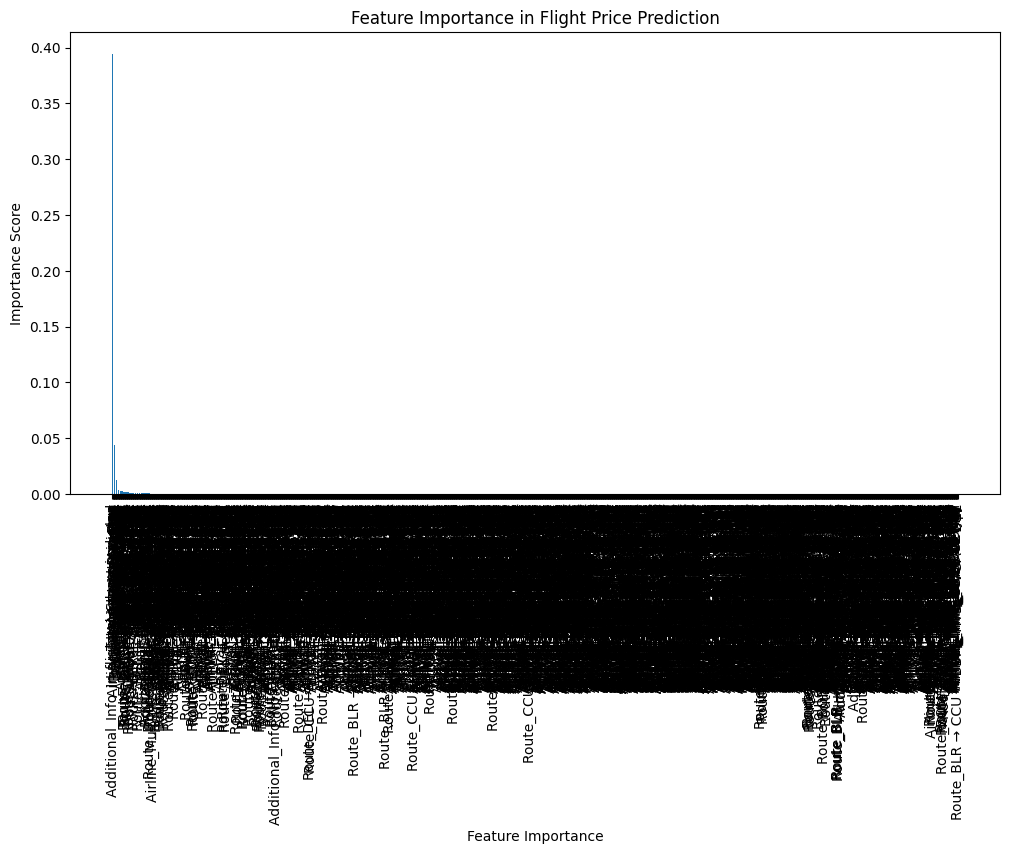

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# # Get feature importance
# feature_importance = best_model.feature_importances_

# # Sort features by importance
# sorted_idx = np.argsort(feature_importance)[::-1]
# feature_names = X_train_scaled.columns

# plt.figure(figsize=(12, 6))
# plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
# plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
# plt.xlabel("Feature Importance")
# plt.ylabel("Importance Score")
# plt.title("Feature Importance in Flight Price Prediction")
# plt.show()


# Assuming `X_train` is the original DataFrame with column names before scaling
feature_names = X_train.columns  # Use the original DataFrame's column names

# Get feature importance from the trained model
feature_importance = best_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Flight Price Prediction")
plt.show()


In [19]:
import joblib
from sklearn.metrics import mean_squared_error

# Save the trained model
joblib.dump(best_model, 'flight_price_model.pkl')

# Load the model later
loaded_model = joblib.load('flight_price_model.pkl')

# Make predictions with the loaded model
y_loaded_pred = loaded_model.predict(X_test_scaled)

# Calculate RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_loaded_pred))

# Print the RMSE
print(f"Loaded Model RMSE: {rmse}")



Loaded Model RMSE: 1357.321683181954


In [20]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the trained model
model = joblib.load('flight_price_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['features']
    prediction = model.predict([data])
    return jsonify({'predicted_price': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

f:\Language Courses Videos\Machine Learning\Complete Data Science, Machine Learning, Deep Learning, NLP Bootcamp 2024-10\python\venv\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [21]:
import streamlit as st
import joblib
import numpy as np

# Load trained model
model = joblib.load('flight_price_model.pkl')

st.title("Flight Price Prediction")

# User Inputs
airline = st.selectbox("Select Airline", ['IndiGo', 'Air India', 'Vistara', 'SpiceJet'])
source = st.selectbox("Select Source", ['Delhi', 'Mumbai', 'Kolkata'])
destination = st.selectbox("Select Destination", ['Cochin', 'Hyderabad', 'Kolkata'])

stops = st.slider("Total Stops", 0, 4, 1)

if st.button("Predict Price"):
    input_data = [airline, source, destination, stops]  # Convert this into model input format
    prediction = model.predict([input_data])
    st.write(f"Predicted Price: ₹{prediction[0]:,.2f}")

2025-02-04 14:57:47.699 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:57:47.766 
  command:

    streamlit run f:\Language Courses Videos\Machine Learning\Complete Data Science, Machine Learning, Deep Learning, NLP Bootcamp 2024-10\python\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-04 14:57:47.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:57:47.768 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:57:47.768 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:57:47.768 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:57:47.768 Thread 'MainThread': missing ScriptRunCon

In [26]:
import joblib

# Save the feature names (after encoding)
joblib.dump(list(X_train.columns), "feature_names.pkl")

# Save the trained model
joblib.dump(model, "flight_price_model.pkl")


['flight_price_model.pkl']

In [27]:
import numpy as np
import joblib
import pandas as pd

# Load the trained model and feature names
model = joblib.load("flight_price_model.pkl")
feature_names = joblib.load("feature_names.pkl")  # Load expected feature names

def preprocess_input(airline, source, destination, stops):
    """Convert categorical inputs into one-hot encoded format with the correct feature order."""
    
    # Create an empty dataframe with the same columns as training data
    input_df = pd.DataFrame(columns=feature_names)

    # Create a dictionary for the input values
    input_data = {col: 0 for col in feature_names}  # Initialize all features to 0

    # Set categorical values
    airline_col = f"Airline_{airline}"
    source_col = f"Source_{source}"
    destination_col = f"Destination_{destination}"
    stops_col = f"Total_Stops_{stops} stops"

    if airline_col in input_data:
        input_data[airline_col] = 1
    if source_col in input_data:
        input_data[source_col] = 1
    if destination_col in input_data:
        input_data[destination_col] = 1
    if stops_col in input_data:
        input_data[stops_col] = 1

    # Convert to DataFrame
    processed_input = pd.DataFrame([input_data])

    return processed_input

# Example user input
airline = "IndiGo"
source = "Delhi"
destination = "Cochin"
stops = 1  # Total stops

# Preprocess the input
processed_input = preprocess_input(airline, source, destination, stops)

# Ensure the correct number of features
processed_input = processed_input.reindex(columns=feature_names, fill_value=0)

# Make the prediction
prediction = model.predict(processed_input)

print(f"Predicted Flight Price: ₹{prediction[0]:,.2f}")


Predicted Flight Price: ₹6,837.09


f:\Language Courses Videos\Machine Learning\Complete Data Science, Machine Learning, Deep Learning, NLP Bootcamp 2024-10\python\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [29]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume `X_train` and `X_test` are Pandas DataFrames before scaling
feature_names = list(X_train.columns)  # Save feature names before scaling

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the feature names and model
joblib.dump(feature_names, "feature_names.pkl")  # Save as a list
joblib.dump(scaler, "scaler.pkl")  # Save the scaler if needed for inference
joblib.dump(model, "flight_price_model.pkl")  # Save the trained model

print(f"Training Features Count: {len(feature_names)}")  # Should be 2094


Training Features Count: 2094


In [30]:
import joblib
import pandas as pd

# Load the trained model and expected feature names
model = joblib.load("flight_price_model.pkl")
feature_names = joblib.load("feature_names.pkl")

print(f"Expected Feature Count: {len(feature_names)}")  # Should be 2094

def preprocess_input(airline, source, destination, stops):
    """Convert categorical inputs into one-hot encoded format with the correct feature order."""
    
    # Create an empty dataframe with the same columns as training data
    input_data = {col: 0 for col in feature_names}  # Initialize all features to 0

    # Set categorical values
    airline_col = f"Airline_{airline}"
    source_col = f"Source_{source}"
    destination_col = f"Destination_{destination}"
    stops_col = f"Total_Stops_{stops} stops"

    if airline_col in input_data:
        input_data[airline_col] = 1
    if source_col in input_data:
        input_data[source_col] = 1
    if destination_col in input_data:
        input_data[destination_col] = 1
    if stops_col in input_data:
        input_data[stops_col] = 1

    # Convert to DataFrame
    processed_input = pd.DataFrame([input_data])

    return processed_input

# Example user input
airline = "IndiGo"
source = "Delhi"
destination = "Cochin"
stops = 1  # Total stops

# Preprocess the input
processed_input = preprocess_input(airline, source, destination, stops)

# **Ensure the correct number of features**
processed_input = processed_input.reindex(columns=feature_names, fill_value=0)

print(f"Processed Input Shape: {processed_input.shape}")  # Should be (1, 2094)

# Make the prediction
prediction = model.predict(processed_input)

print(f"Predicted Flight Price: ₹{prediction[0]:,.2f}")


Expected Feature Count: 2094
Processed Input Shape: (1, 2094)
Predicted Flight Price: ₹6,837.09


f:\Language Courses Videos\Machine Learning\Complete Data Science, Machine Learning, Deep Learning, NLP Bootcamp 2024-10\python\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
